   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       1  
1   0     3       0  
2   0     3       2  
3   1     3       2  
4   3     2       2  


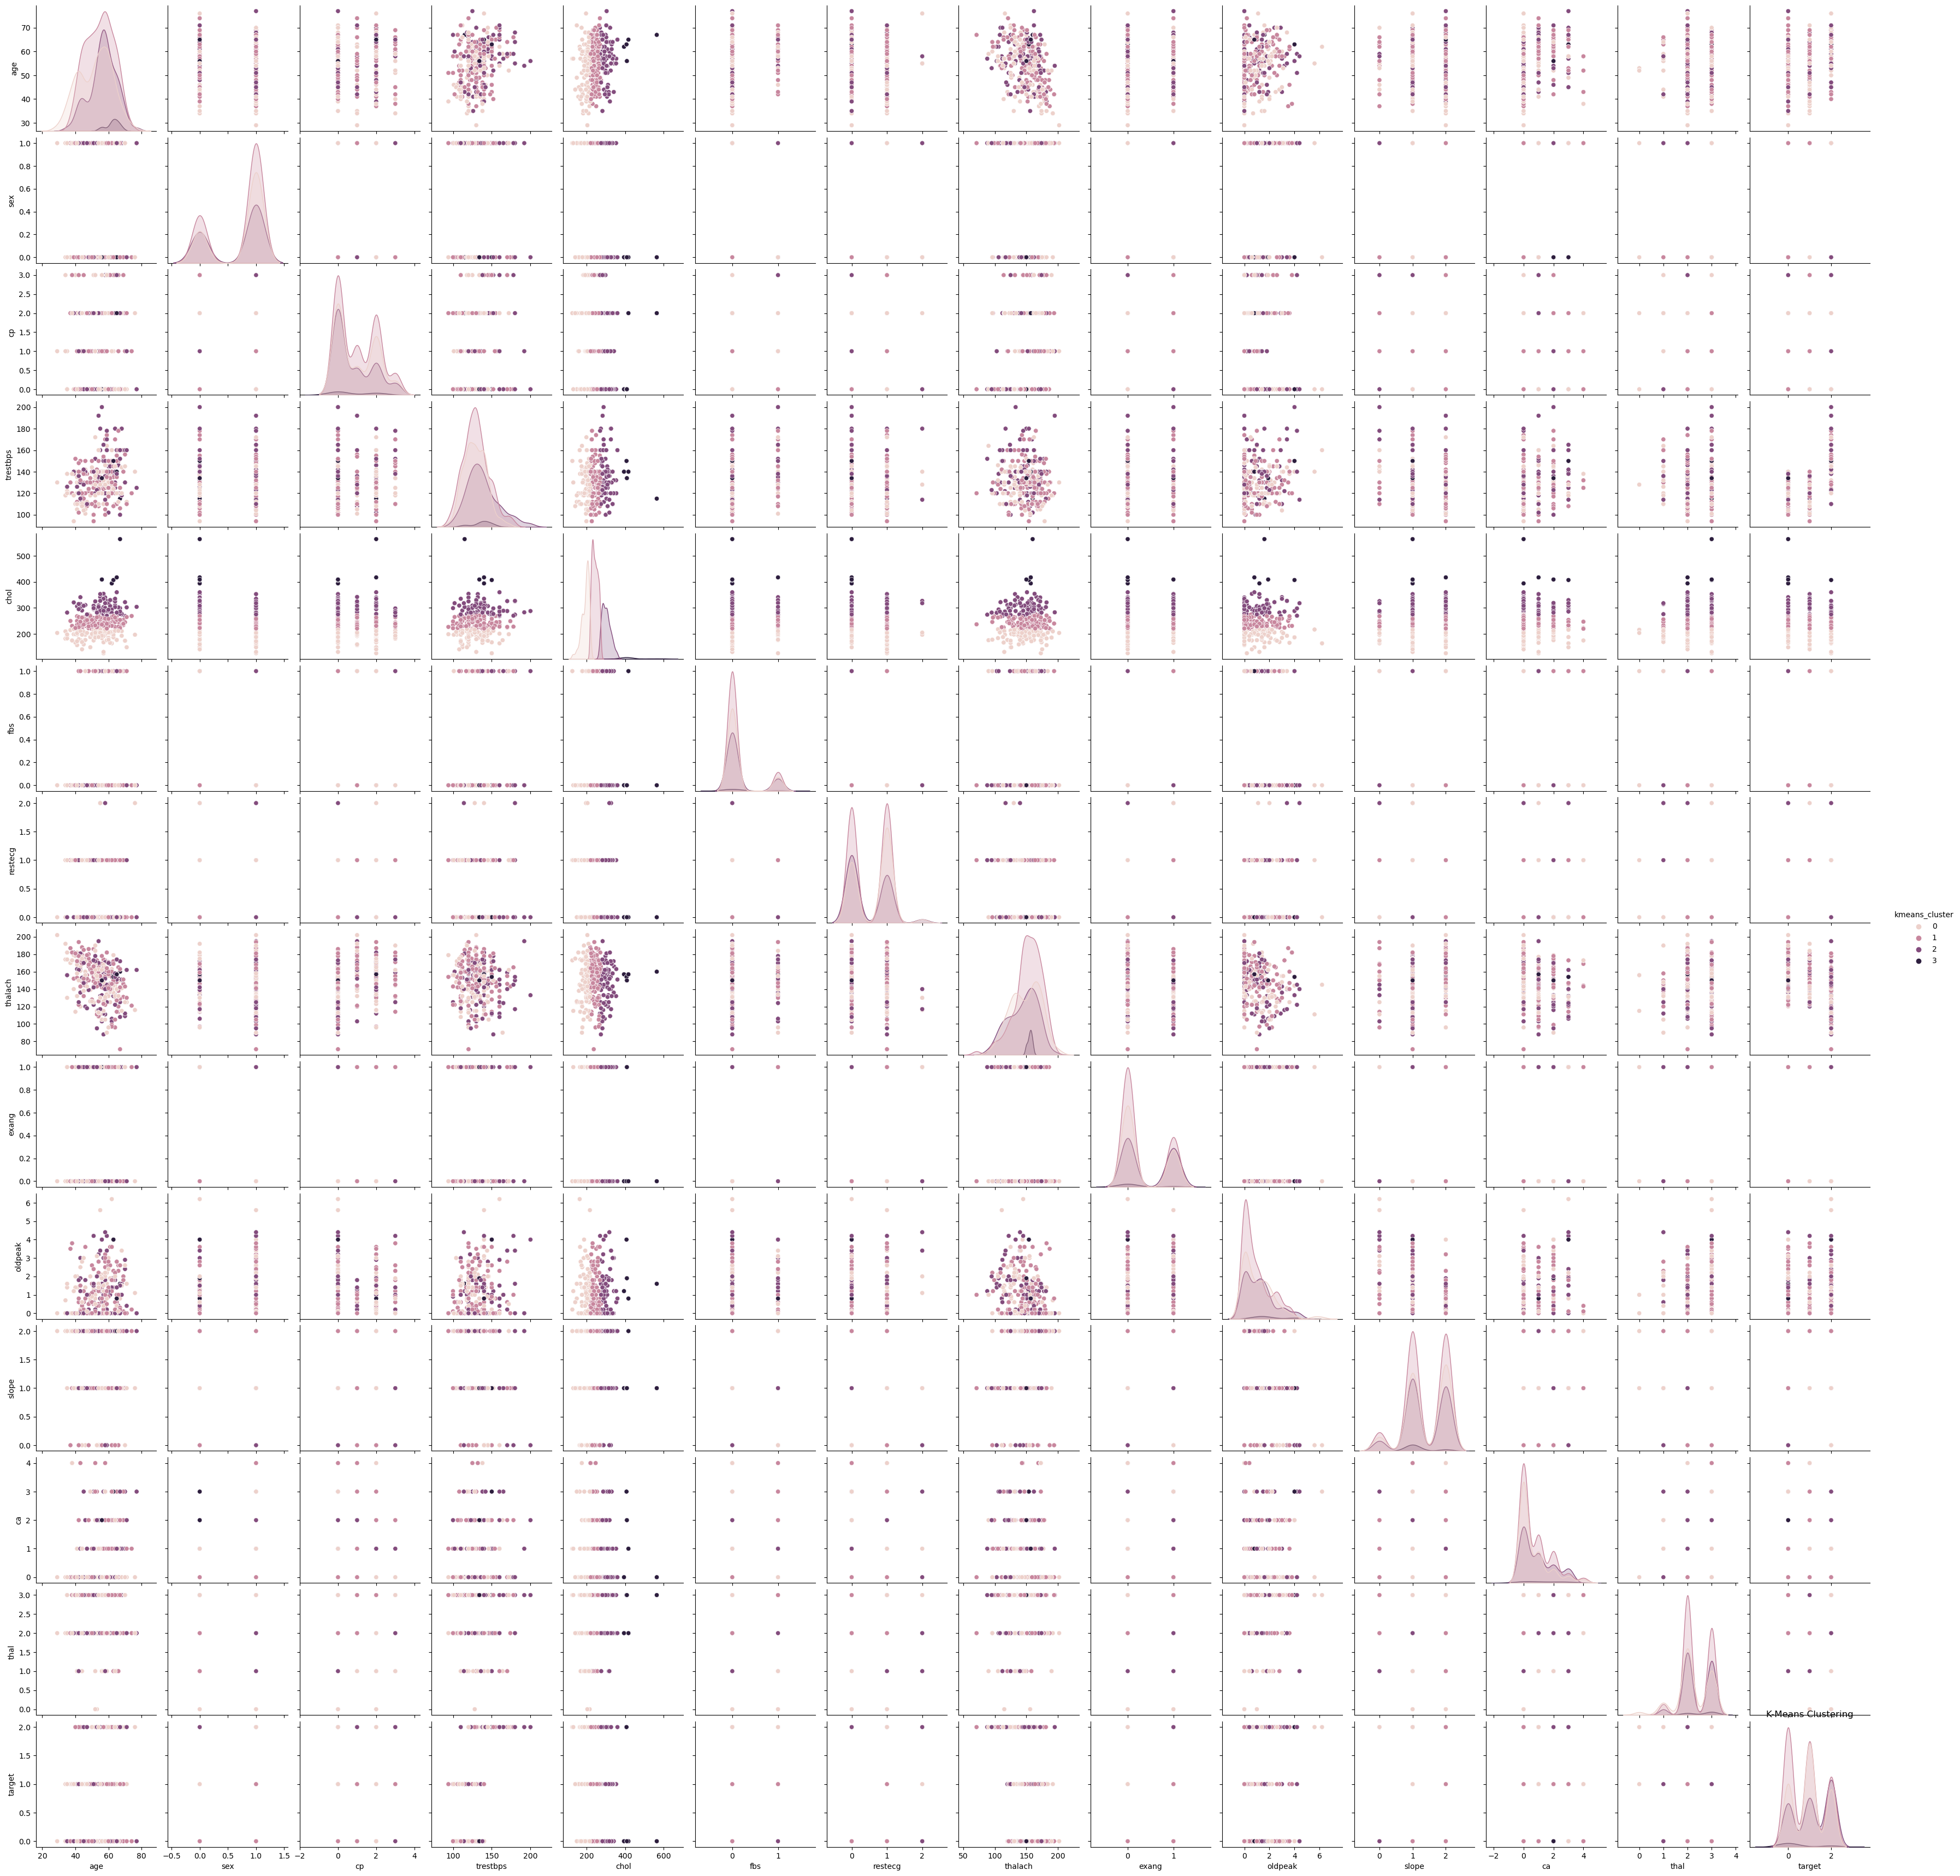

Confusion Matrix:
[[54  3  3]
 [ 0 79  4]
 [ 6  9 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        60
           1       0.87      0.95      0.91        83
           2       0.87      0.76      0.81        62

    accuracy                           0.88       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.88      0.88       205



C:\Users\ladan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("C:\\Users\\ladan\\Downloads\\heart1 (1).csv")


# Display the first few rows of the dataset
print(data.head())

# Extract features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
data['kmeans_cluster'] = kmeans.labels_

# Visualize clusters using pairplot
sns.pairplot(data=data, hue='kmeans_cluster')
plt.title('K-Means Clustering')
plt.show()

# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

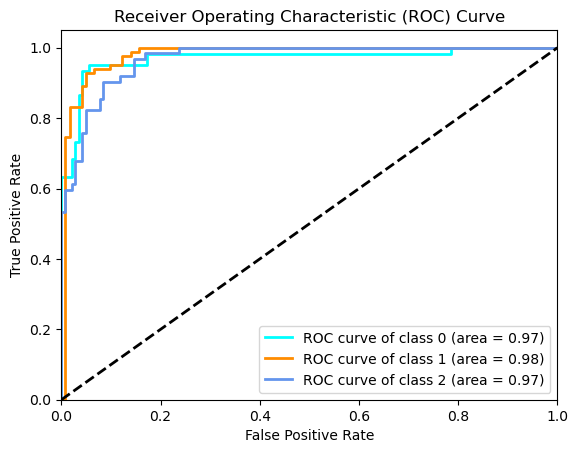

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the target variable
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Calculate probabilities for each class
y_probs = logreg.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_probs[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_probs[:, i])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

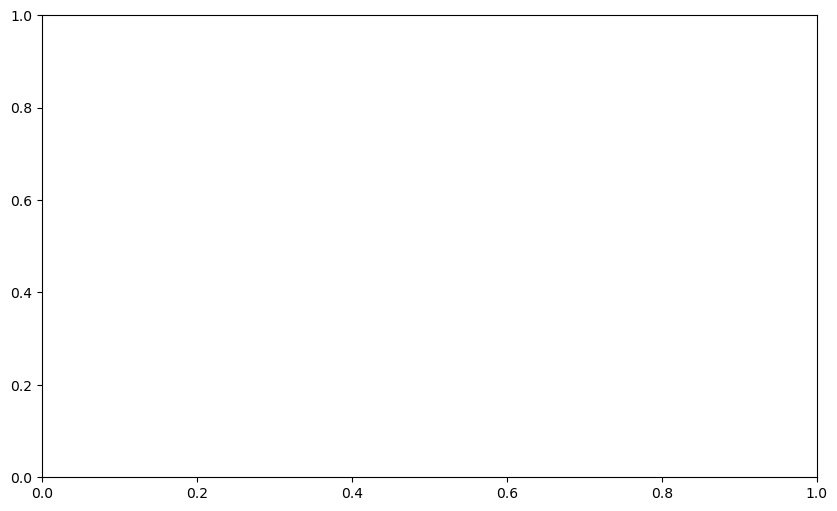

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

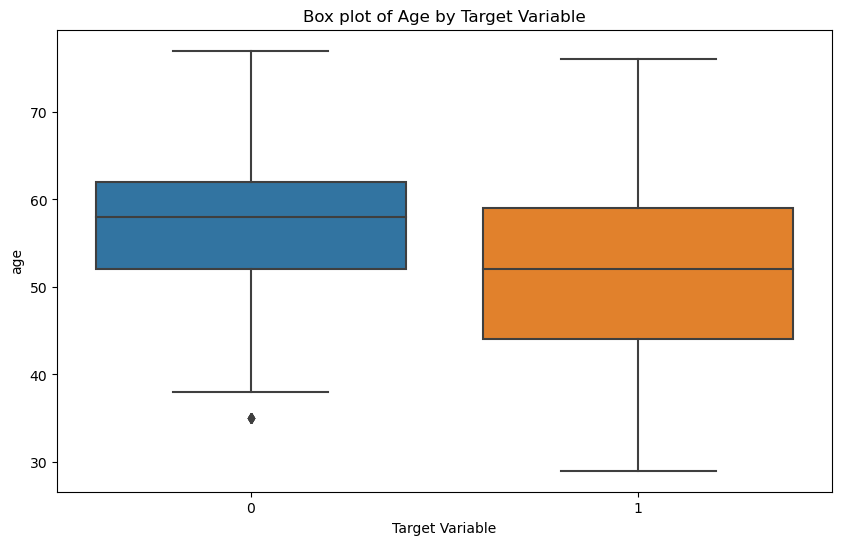

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for attribute 'age' (assuming 'age' is the column name) grouped by target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.xlabel('Target Variable')
plt.ylabel('age')
plt.title('Box plot of Age by Target Variable')
plt.show()


<Figure size 1000x600 with 0 Axes>

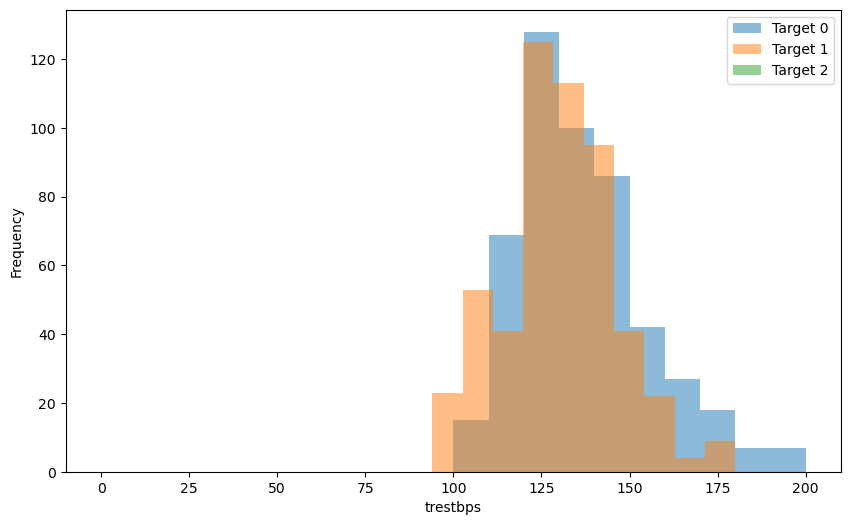

In [16]:
import matplotlib.pyplot as plt

# Histogram for attribute '0' grouped by target variable
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming target variables are 0, 1, 2
    plt.hist(df[df['target'] == i]['trestbps'], alpha=0.5, label=f'Target {i}')
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

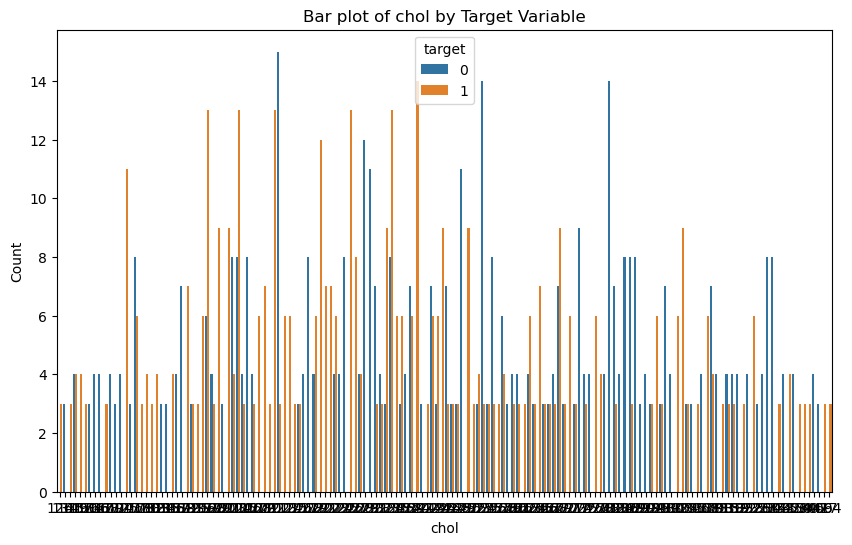

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for attribute '2' grouped by target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='chol', hue='target', data=df)
plt.xlabel('chol')
plt.ylabel('Count')
plt.title('Bar plot of chol by Target Variable')
plt.show()

In [19]:
# Pair plot for a subset of attributes
sns.pairplot(df[['0', '1', '2', 'Attribute3', 'Attribute4', 'Attribute5', 'target']], hue='target')
plt.show()



KeyError: "['0', '1', '2', 'Attribute3', 'Attribute4', 'Attribute5'] not in index"

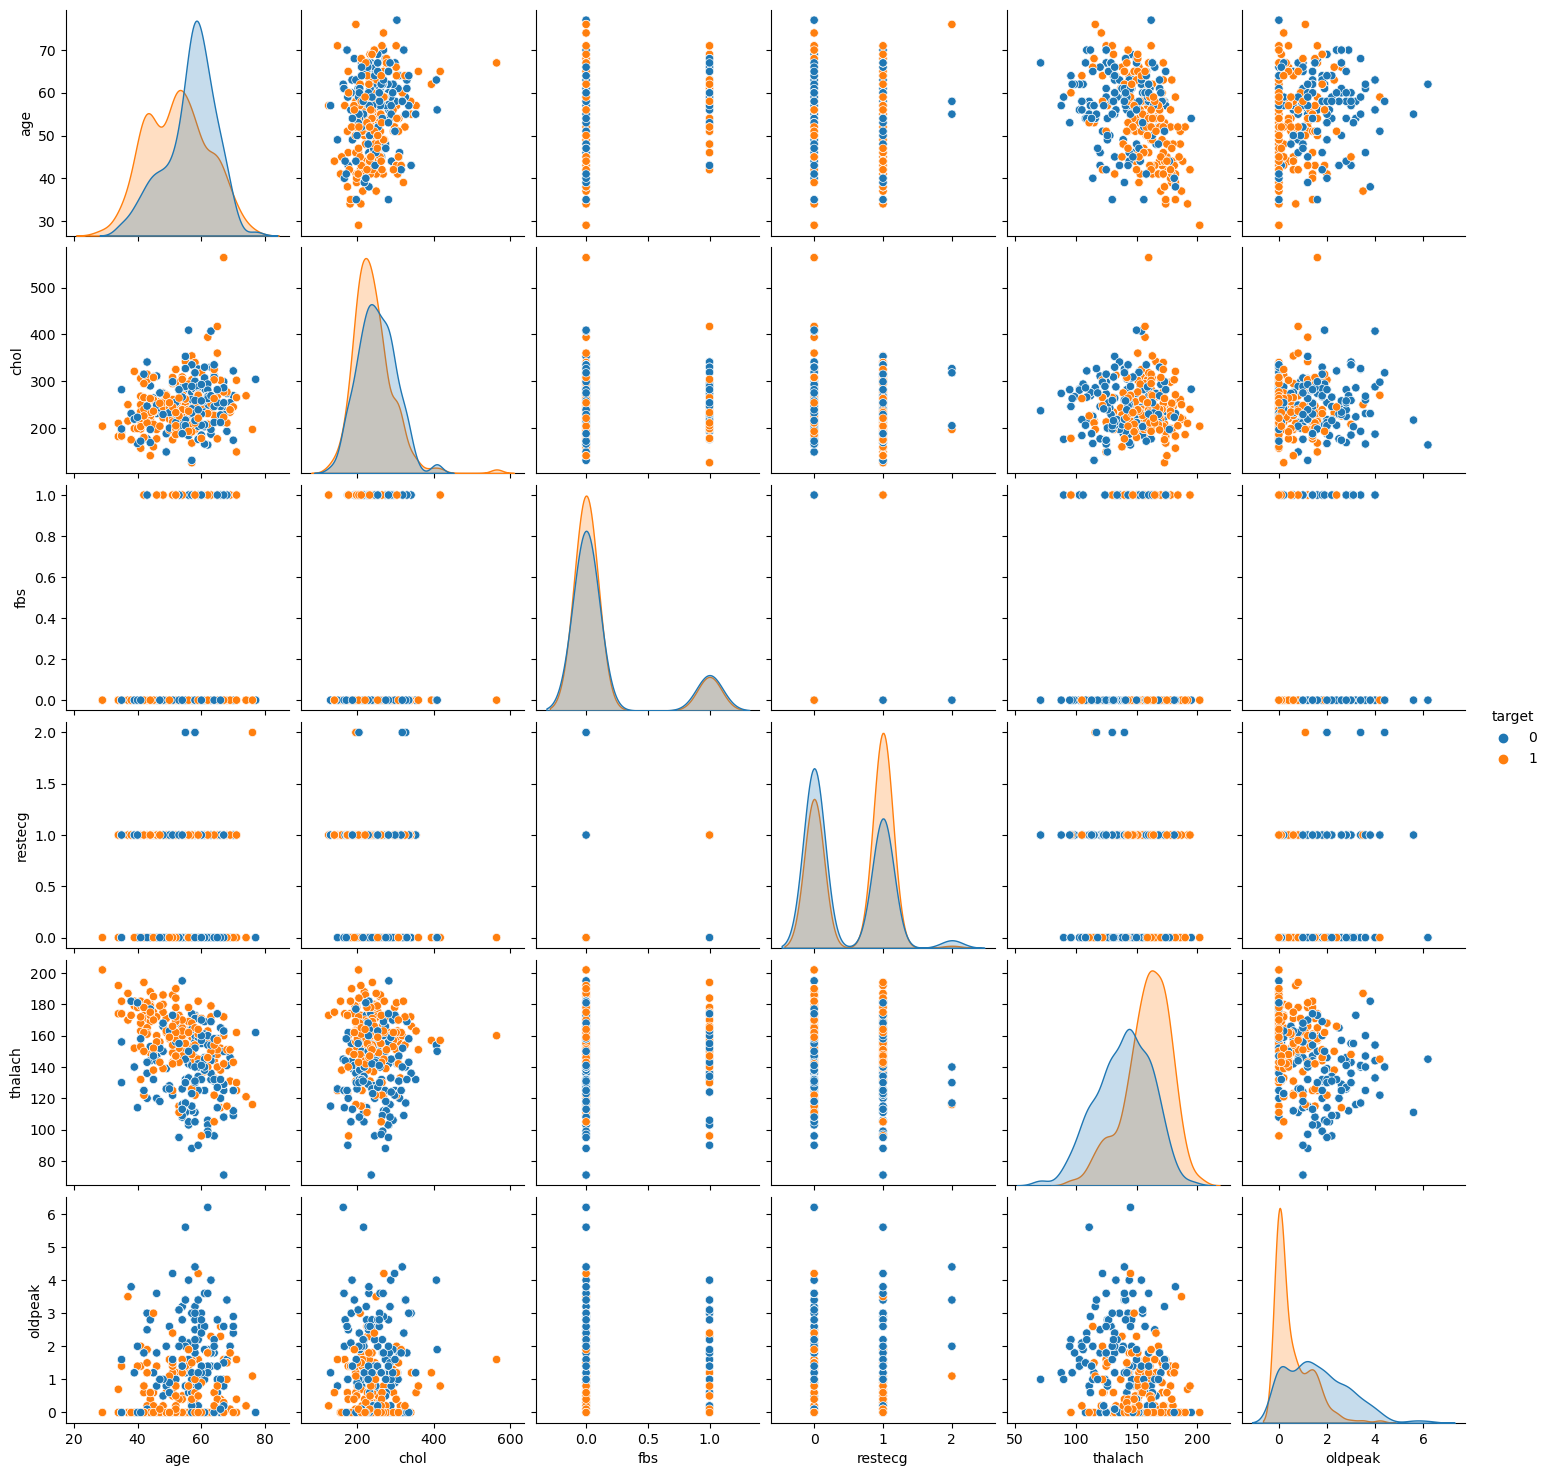

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for a subset of attributes
sns.pairplot(df[['age', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak', 'target']], hue='target')
plt.show()


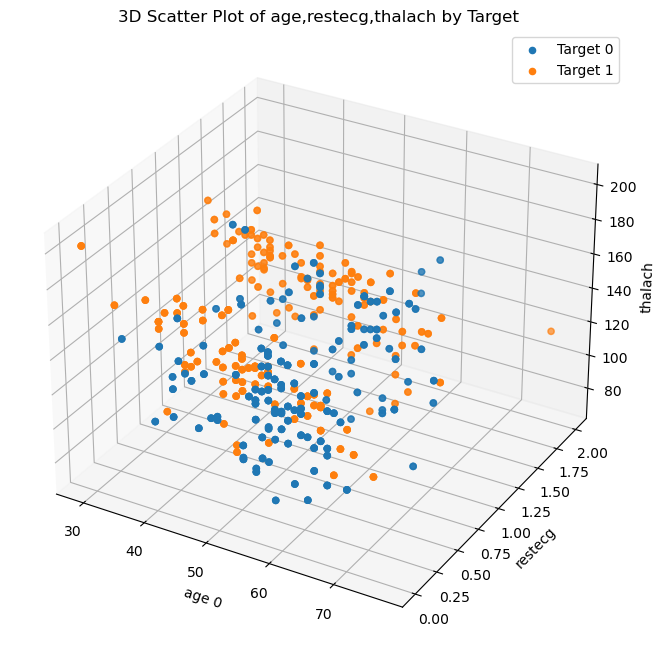

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points for each target class
for target_val in df['target'].unique():
    subset = df[df['target'] == target_val]
    ax.scatter(subset['age'], subset['restecg'], subset['thalach'], label=f'Target {target_val}')

# Set labels and title
ax.set_xlabel('age 0')
ax.set_ylabel('restecg')
ax.set_zlabel('thalach')
ax.set_title('3D Scatter Plot of age,restecg,thalach by Target')

# Add legend
ax.legend()

plt.show()


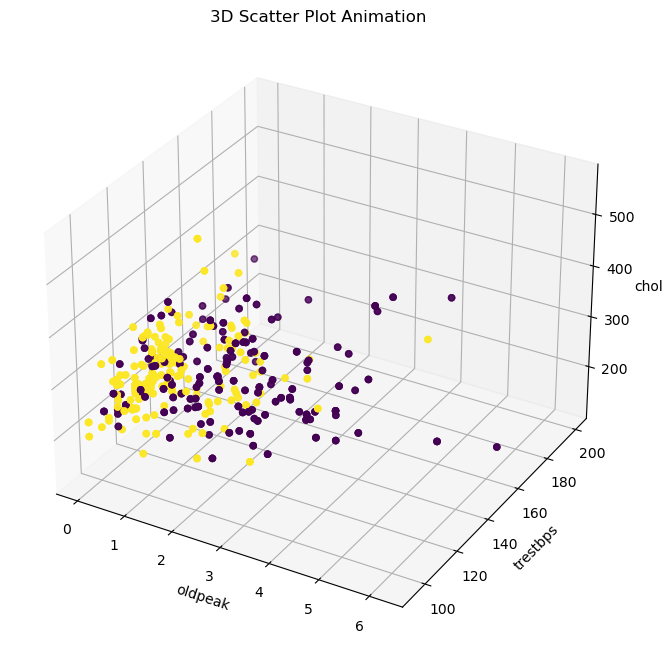

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points for each target class
scatter = ax.scatter(df['oldpeak'], df['trestbps'], df['chol'], c=df['target'])

# Function to update the plot for animation
def update(frame):
    ax.view_init(elev=10, azim=frame)
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)

# Set labels and title
ax.set_xlabel('oldpeak')
ax.set_ylabel('trestbps')
ax.set_zlabel('chol')
ax.set_title('3D Scatter Plot Animation')

plt.show()


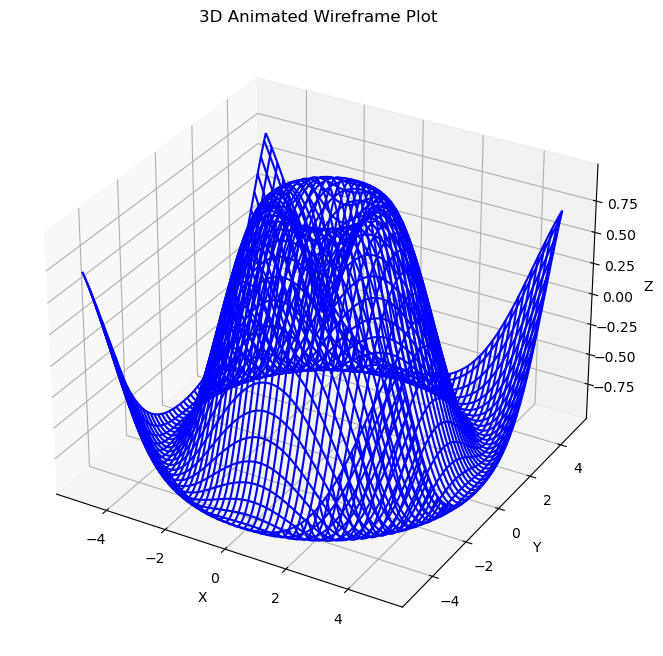

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np

# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a wireframe
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

wireframe = ax.plot_wireframe(X, Y, Z, color='b')

# Function to update the wireframe for animation
def update(frame):
    ax.view_init(elev=30, azim=frame)
    return wireframe,

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Animated Wireframe Plot')

plt.show()
